### Plotnine is an easy to use python package that is based off of ggplot2 in R. 
### Docs are here: https://plotnine.readthedocs.io/en/stable/index.html
### Some sample tutorials are here: https://realpython.com/ggplot-python/ 
### https://www.practicaldatascience.org/html/plotting_part1.html

### Improvements Made:
<body>
    <ul>
        <li>Uses functions from a utilities script to remove large chunks of code that are unavoidably repetitive and/or confusing.</li>
        <li>Interprets inputs and makes explicit and implicit decisions based on user input.</li>
        <li>Figured out a way to label x-axis with customizeable scaling.</li>
        <li>Display scaling in hour:minute format.</li>
        <li>All user inputs are located at the top of the document. Inputs are also screened.</li>
        <li>Cleaner version of plate_reader_analysis_EH_multiple_channels_test</li>
        <li>Removed "Reading" or "reading" from the column names to make them more concise.</li>
        <li>The conditions labels on the facet plots adjust depending on the respective channel's scale</li>
    </ul>
</body>

**Note about the Data:** This template uses data from the validation set mentioned in the thesis. These plots were then altered for clarity using Affinity in the final report, but changing labels is possible within the notebook. 

In [1]:
## Goal of the Chunk: Importing all necessary packages and the utilities helper function file
# If there is an error about a package not existing, pip install {package_name} 
import os
import numpy as np
from numpy import nanmedian
import pandas as pd
import plotnine
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.4f}".format # display float values to four decimal places


from utilities import scaling_params, handle_input

# Setting the theme here will make all subsequent plots have the same theme.
# Using the theme in the plots will override the default if that theme is not desired for a particular plot.
# theme_set({theme_name()})

In [2]:
# In the future, it would be nice to just specify the file name and save the plots in a plots directory automatically
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'amiga_preprocessing.ipynb',
 'amiga_processed_processed_compiled_autosave_diauxie.txt',
 'amiga_processed_processed_compiled_autosave_summary.txt',
 'analyze.py',
 'customized_amiga_output_summary.xlsx',
 'data',
 'df_melted_excel.xlsx',
 'eh_expansion_v3.py',
 'first_look_AMiGA_graphical_numerical_improved_winter_2022.ipynb',
 'plate_reader_analysis_EH_compilation.ipynb',
 'plots',
 'preprocessing_excel_data.py',
 'processed_compiled_autosave.xlsx',
 'utilities.py',
 '__pycache__']

## User Inputs

In [3]:
## Goal of the Chunk: Specify file to be opened and load its information


# The user has two options:
# 1. Input the file path for the data to be transformed and supply a directory for the output file to be saved in.
# 2. Input the file path for the data to be transformed and supply an empty string.
#    The empty string means that it is assumed that the user wants to store their output data in the same input directory.
# Any incorrect file names or directories will be filtered out.
# However, a new directory can be created in an existing folder and the output files will be saved there

# with these data, the file is an .xls instead of an .xlsx file (Excel version from 97-03)
input_file_path = "processed_compiled_autosave.xlsx"
output_dir_path = "plots/"
## This concept was borrowed from the Jupyter Notebook script for finding genes of interest that July and I wrote.
# If no "True" is found, this part stops the rest of the code from running.
# It then informs the user if the gene symbol was entered incorrectly and stops running the subsequent code.
class StopExecution(Exception):
    def _render_traceback_(self):
        pass
    
# Calling the helper function from the utilities.py script
# This is the function that will follow
user_input_storage = handle_input(input_file_path, output_dir_path)
Found = user_input_storage[0]
plot_path = user_input_storage[1]
    
# Stopping the rest of the script from running if there are invalid inputs
if Found == False:
    print("The script was stopped.")
    raise StopExecution

# Reading in the data from the required input    
data_imported=pd.read_excel(input_file_path, sheet_name='Data', usecols=lambda x: 'Unnamed' not in x,)
#remove temperature column 
data_imported.drop(['Temp. [°C]'], axis=1, inplace=True)
# Loading the well information
well_info=pd.read_excel(input_file_path, sheet_name='Wells', usecols=lambda x: 'Unnamed' not in x,)


# data_imported["Time [s] Adjusted"] = data_imported["Time [s]"].apply(str)

final_seconds_list = []

data_imported

,Channel,Cycle Nr.,Time [s],A1,A2,A3,A4,A5,A6,A7,...,G10,G11,G12,H1,H2,H3,H4,H5,H6,H7
0,OD600,1,0.0000,0.0780,0.0820,0.0830,0.0820,0.0830,0.0780,0.0830,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1000,0.1000,0.1000,0.0900
1,OD600,2,900.0200,0.0780,0.0820,0.0830,0.0820,0.0830,0.0780,0.0840,...,0.0500,0.0500,0.0500,0.1000,0.1000,0.1000,0.1100,0.1100,0.1100,0.0900
2,OD600,3,"1,800.0260",0.0780,0.0820,0.0830,0.0830,0.0840,0.0790,0.0860,...,0.1000,0.1000,0.1000,0.2000,0.2000,0.2000,0.1221,0.1221,0.1221,0.0900
3,OD600,4,"2,700.0420",0.0780,0.0830,0.0840,0.0850,0.0870,0.0810,0.0910,...,0.1500,0.1500,0.1500,0.3000,0.3000,0.3000,0.1370,0.1370,0.1370,0.0900
4,OD600,5,"3,600.0460",0.0780,0.0840,0.0850,0.0870,0.0910,0.0810,0.0970,...,0.2000,0.2000,0.2000,0.4000,0.4000,0.4000,0.1558,0.1558,0.1558,0.0900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,OD600,60,"53,100.6990",0.0780,0.5840,0.5690,0.6280,0.6210,0.0830,0.9780,...,0.3500,0.3500,0.3500,0.3000,0.3000,0.3000,0.3420,0.3420,0.3420,0.0900
60,OD600,61,"54,000.7160",0.0780,0.5830,0.5720,0.6280,0.6170,0.0830,0.9790,...,0.4000,0.4000,0.4000,0.2000,0.2000,0.2000,0.3712,0.3712,0.3712,0.0900
61,OD600,62,"54,900.7370",0.0780,0.5750,0.5680,0.6240,0.6200,0.0830,0.9800,...,0.4500,0.4500,0.4500,0.1000,0.1000,0.1000,0.4057,0.4057,0.4057,0.0900
62,OD600,63,"55,800.7430",0.0780,0.5990,0.5770,0.6220,0.6180,0.0830,0.9780,...,0.5000,0.5000,0.5000,0.2000,0.2000,0.2000,0.4468,0.4468,0.4468,0.0900


In [4]:
# specify if want background subtraction done - if forgot to include media only wells then you should set this to false
background_subtraction=True

## Start of Loading the Data

In [5]:
# Reformat the data so that we can plot all replicates together
df_melted = pd.melt(data_imported, id_vars=['Channel', 'Cycle Nr.', 'Time [s]'], var_name="Well", value_name="Reading")

# Merging with the information in the well_info sheet
df_melted = pd.merge(df_melted, well_info, on = "Well")

# this helps with plotting whole plate map
df_melted['Plate_Row']=df_melted['Well'].str.split('([A-Za-z]+)(\d+)').str[1]
df_melted['Plate_Column']=df_melted['Well'].str.split('([A-Za-z]+)(\d+)').str[2]
df_melted=df_melted.astype({'Plate_Column': 'int'})

# this maps condition to each well
mapping_condition = dict(well_info[['Well', 'Condition']].values)
df_melted['Condition']=df_melted.Well.map(mapping_condition)
if background_subtraction == True:
    mapping_bgd = dict(well_info[['Well', 'Background_group']].values)
    df_melted['Background_group']=df_melted.Well.map(mapping_bgd)
    
df_melted

,Channel,Cycle Nr.,Time [s],Well,Reading,Condition,Background_group,Strain,Group,Control,Plate_Row,Plate_Column
0,OD600,1,0.0000,A1,0.0780,Blank,M9G_s,none,none,none,A,1
1,OD600,2,900.0200,A1,0.0780,Blank,M9G_s,none,none,none,A,1
2,OD600,3,"1,800.0260",A1,0.0780,Blank,M9G_s,none,none,none,A,1
3,OD600,4,"2,700.0420",A1,0.0780,Blank,M9G_s,none,none,none,A,1
4,OD600,5,"3,600.0460",A1,0.0780,Blank,M9G_s,none,none,none,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5819,OD600,60,"53,100.6990",H7,0.0900,Blank,M9G_syn,none,none,none,H,7
5820,OD600,61,"54,000.7160",H7,0.0900,Blank,M9G_syn,none,none,none,H,7
5821,OD600,62,"54,900.7370",H7,0.0900,Blank,M9G_syn,none,none,none,H,7
5822,OD600,63,"55,800.7430",H7,0.0900,Blank,M9G_syn,none,none,none,H,7


In [6]:
# Uncomment these lines and run them for each contaminated well if there are any
# It's not that this well is contaniminated, it's just that nothing grew.
# Taking averages would mess with this, so out it goes.
# bad_wells = ["D8"]
# df_melted=df_melted[~df_melted.Well.isin(bad_wells)]

In [7]:
# first let's try to extract background data
bgd_name= 'Blank' # just change it to whatever you called it - blank, empty, media etc

if background_subtraction == True:
    # filtering out the blank condition for this new data frame
    all_bgd_data = df_melted[df_melted.Condition==bgd_name]
    # now calculate average for each blank condition at each timepoint
    # group by channel and background gp and take average at each timepoint
    # a form of normalization
    bgd_data_grouped=all_bgd_data.groupby(['Channel', 'Background_group', 'Cycle Nr.'])['Reading']
    background_average = pd.DataFrame(bgd_data_grouped.mean()).reset_index()
else:
    pass

In [8]:
# now this should add new column with correct background reading based on channel, cycle, background gp
if background_subtraction == True:
#     the background to subtract is the same for each time point
    df_melted['background_reading']=df_melted[['Channel', 'Cycle Nr.', 'Background_group']].merge(background_average,how='left').Reading
#     now make a new column that subtracts background from reading
    df_melted['Bgd_subtracted_reading']=df_melted['Reading']-df_melted['background_reading']
else:
    pass

# For extra security:
# This reorders the final_df alphabetically and numerically (e.g. A1 first, H12 last if full plate)
df_melted = df_melted.sort_values(by = ["Plate_Row", "Plate_Column"], ignore_index = True)
# This data frame is tidy
df_melted

#### Added 8/18- writing df_melted to an excel file so I can have access to it in another Jupyter Notebook
df_melted_excel = pd.DataFrame()
df_melted_excel = df_melted.to_excel('df_melted_excel.xlsx', sheet_name = "Data")

In [9]:
## Goal of the Chunk: Restructure df_melted and create channel readings as columns, 
## background subtracted readings as columns, and calculate normalized values for each channel (except OD600)
# Restructure dataframe as sometimes it is easier to plot like this
if background_subtraction == True:
    final_df = df_melted.pivot_table(index=['Well', 'Cycle Nr.', 'Plate_Row', 'Plate_Column', 'Condition','Background_group', "Strain", "Time [s]"], columns='Channel', values = ['Reading','Bgd_subtracted_reading'])
elif background_subtraction == False:
    final_df = df_melted.pivot_table(index=['Well', 'Cycle Nr.', 'Plate_Row', 'Plate_Column', 'Condition','Background_group', "Strain", "Time [s]"], columns='Channel', values = ['Reading'])
    
final_df.columns = ['_'.join(col).strip() for col in final_df.columns.values]
final_df.reset_index(inplace=True)


# Pulling out channel names
channel_list = []

for row in df_melted["Channel"]:
    if row not in channel_list:
        channel_list.append(row)
        
# Normalizing by Channel
revised_channel_list = []

for channel in channel_list:
    if channel == "OD600":
        pass
    else:
        revised_channel_list.append(channel)

# Creating the Normalized columns- regular
for channel in revised_channel_list:
    channel_col_name = "Reading_" + channel
    channel_col_name_normalized = channel + "_Norm"
    final_df[channel_col_name_normalized] = final_df[channel_col_name] / final_df["Reading_OD600"]

# Creating the Normalized columns - background subtracted
if background_subtraction == True:
    for channel in revised_channel_list:
        channel_col_name = "Bgd_subtracted_reading_" + channel
        channel_col_name_normalized = "Bgd_subtracted_" + channel + "_Norm"
        final_df[channel_col_name_normalized] = final_df[channel_col_name] / final_df["Bgd_subtracted_reading_OD600"]
else:
    pass

# This reorders the final_df alphabetically and numerically (e.g. A1 first, H12 last if full plate)
final_df = final_df.sort_values(by = ["Plate_Row", "Plate_Column"], ignore_index = True)

# Removing the "Reading" or "reading" from the column names
for col in final_df:
    if col[:8] == "Reading_":
        final_df = final_df.rename(columns = {col: col[8:]})
    elif col[15:22] == "reading":
        final_df = final_df.rename(columns = {col: (col[:15] + col[23:])})
    else:
        pass
final_df

,Well,Cycle Nr.,Plate_Row,Plate_Column,Condition,Background_group,Strain,Time [s],Bgd_subtracted_OD600,OD600
0,A1,1,A,1,Blank,M9G_s,none,0.0000,0.0000,0.0780
1,A1,2,A,1,Blank,M9G_s,none,900.0200,0.0003,0.0780
2,A1,3,A,1,Blank,M9G_s,none,"1,800.0260",0.0003,0.0780
3,A1,4,A,1,Blank,M9G_s,none,"2,700.0420",0.0003,0.0780
4,A1,5,A,1,Blank,M9G_s,none,"3,600.0460",0.0003,0.0780
...,...,...,...,...,...,...,...,...,...,...
5819,H7,60,H,7,Blank,M9G_syn,none,"53,100.6990",0.0000,0.0900
5820,H7,61,H,7,Blank,M9G_syn,none,"54,000.7160",0.0000,0.0900
5821,H7,62,H,7,Blank,M9G_syn,none,"54,900.7370",0.0000,0.0900
5822,H7,63,H,7,Blank,M9G_syn,none,"55,800.7430",0.0000,0.0900


In [10]:
## Goal of the Chunk: Automate selecting the position of the condition labels for the overall facet plots
# Running calculations for y_label_pos 
# Grouping by channel and calculating the median fluorescence value and resetting the index
# Using a post on Stack Overflow, I found out how to use np.nanmean following a group_by() function applied to a DataFrame
# https://stackoverflow.com/questions/44520185/when-therere-nans-and-you-want-to-use-groupby
grouped_melted = df_melted.groupby(["Channel"]).agg(np.nanmean).reset_index()
# Selecting only the columns that matter (Channel used as a key, everything else will be added)
if background_subtraction == True:
    grouped_melted = grouped_melted[["Channel", "Reading", "background_reading", "Bgd_subtracted_reading"]]
else:
    grouped_melted = grouped_melted[["Channel", "Reading"]]
# Creating a blank dataframe to reset when this cell is run more than once
combined = pd.DataFrame()
# Merging df_melted and grouped_melted using "Channel" as the key, or unique identifier for each observation
combined = pd.merge(df_melted, grouped_melted, on = ["Channel"])
# When you merge dataframes with the same column name, one gets _x and the other _y to not overwrite the other
# Reading_x is the original reading, Reading_y is the median calculated in the original 'group_by()' function
combined = combined.rename(columns = {"Reading_x":"Reading", "background_reading_x": "background_reading"})

### Formatting the Time

#### df_melted

In [11]:
melted_to_use=df_melted

melted_to_use = melted_to_use.rename(columns={"Time [s]": "Time"})

melted_to_use.Time = np.where(melted_to_use.Time, melted_to_use.Time // 3600 + melted_to_use.Time // 60, melted_to_use.Time)

endpt = int(round(melted_to_use["Time"].max() // 60, 0))

melted_to_use["Condition"] = melted_to_use["Condition"].astype(str)

melted_to_use["Strain"] = melted_to_use["Strain"].astype(str)


melted_to_use

,Channel,Cycle Nr.,Time,Well,Reading,Condition,Background_group,Strain,Group,Control,Plate_Row,Plate_Column,background_reading,Bgd_subtracted_reading
0,OD600,1,0.0000,A1,0.0780,Blank,M9G_s,none,none,none,A,1,0.0780,0.0000
1,OD600,2,15.0000,A1,0.0780,Blank,M9G_s,none,none,none,A,1,0.0777,0.0003
2,OD600,3,30.0000,A1,0.0780,Blank,M9G_s,none,none,none,A,1,0.0777,0.0003
3,OD600,4,45.0000,A1,0.0780,Blank,M9G_s,none,none,none,A,1,0.0777,0.0003
4,OD600,5,61.0000,A1,0.0780,Blank,M9G_s,none,none,none,A,1,0.0777,0.0003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,OD600,60,899.0000,H7,0.0900,Blank,M9G_syn,none,none,none,H,7,0.0900,0.0000
5820,OD600,61,915.0000,H7,0.0900,Blank,M9G_syn,none,none,none,H,7,0.0900,0.0000
5821,OD600,62,930.0000,H7,0.0900,Blank,M9G_syn,none,none,none,H,7,0.0900,0.0000
5822,OD600,63,945.0000,H7,0.0900,Blank,M9G_syn,none,none,none,H,7,0.0900,0.0000


#### final_df

In [12]:
final_to_use=final_df

final_to_use = final_to_use.rename(columns={"Time [s]": "Time"})

final_to_use.Time = np.where(final_to_use.Time, final_to_use.Time // 3600 + final_to_use.Time // 60, final_to_use.Time)

endpt = int(round(final_to_use["Time"].max() // 60, 0))

final_to_use["Condition"] = final_to_use["Condition"].astype(str)

final_to_use["Strain"] = final_to_use["Strain"].astype(str)


final_to_use

,Well,Cycle Nr.,Plate_Row,Plate_Column,Condition,Background_group,Strain,Time,Bgd_subtracted_OD600,OD600
0,A1,1,A,1,Blank,M9G_s,none,0.0000,0.0000,0.0780
1,A1,2,A,1,Blank,M9G_s,none,15.0000,0.0003,0.0780
2,A1,3,A,1,Blank,M9G_s,none,30.0000,0.0003,0.0780
3,A1,4,A,1,Blank,M9G_s,none,45.0000,0.0003,0.0780
4,A1,5,A,1,Blank,M9G_s,none,61.0000,0.0003,0.0780
...,...,...,...,...,...,...,...,...,...,...
5819,H7,60,H,7,Blank,M9G_syn,none,899.0000,0.0000,0.0900
5820,H7,61,H,7,Blank,M9G_syn,none,915.0000,0.0000,0.0900
5821,H7,62,H,7,Blank,M9G_syn,none,930.0000,0.0000,0.0900
5822,H7,63,H,7,Blank,M9G_syn,none,945.0000,0.0000,0.0900


### Setting Default Values for Plotting

In [13]:
# Re-establishing the dimensions
figure_height=11
figure_width=6

In [14]:
# Setting the max_hour (the default is to plot all data available)
endpt = int(round(final_to_use["Time"].max() // 60, 0) + 1)

## Plots

#### ggplot guidelines

*Commenting line by line to show basic format of the graphs:
(putting this here because ggplot in plotnine does not like comments in the working ggplot function)*<br>
 faceted_wells_melted_hours = ggplot(data_to_plot, aes(x=xvar, y=yvar)) +\
            &emsp;*Making a scatterplot* <br>
            &emsp;geom_point(size=0.1) +\\<br>
            &emsp;*Adding a line to fit the data*<br>
            &emsp;geom_line() +\\<br>
            &emsp;*Labeling the y-axis*<br>
            &emsp;ylab(channel_to_plot)+\\<br>
            &emsp;*Labeling the x-axis*<br>
            &emsp;xlab("Time (Hours:Minutes)") +\\<br>
            &emsp;*Making a facet grid- plotting two variables at once to group the data by <br>
            &emsp;to mimic the shape of the wells on the plate*<br>
            &emsp;facet_grid(facets="Plate_Row~Plate_Column")+\\<br>
            &emsp;*Adding the labels like 1:100, 1:400, and Blank*<br>
            &emsp;geom_text(data=data_to_plot, x=x_label_pos, y=y_label_pos[0],size=6,alpha=0.1,label=data_to_plot.Condition) +\\<br>
            &emsp;*Setting the scale for the x-axis using the returned values from the user_params <br>
            &emsp;of the scaling_params() helper function*<br>
            &emsp;scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\\<br>
            &emsp;*Angling the text so they do not overlap*<br>
            &emsp;theme(axis_text_x=element_text(rotation=90))<br>
    &emsp;print(faceted_wells_melted_hours)<br>
    &emsp;*Saving the plot with a standardized path<br>
    &emsp;If the plots do not need to be saved, comment out this line*<br>
    faceted_wells_melted_hours.save(os.path.join(plot_path,"faceted_wells_melted_hours_")+channel_to_plot+"_"+user_params[6]+'.pdf', height=figure_width, width=figure_height)<br>
    *Cycling through the channels to plot*<br>
    counter += 1

#### Using df_melted

In [15]:
# Setting the right data to use
# this line will need to be rerun for the plots below if data_to_use == final_df
data_to_use = melted_to_use

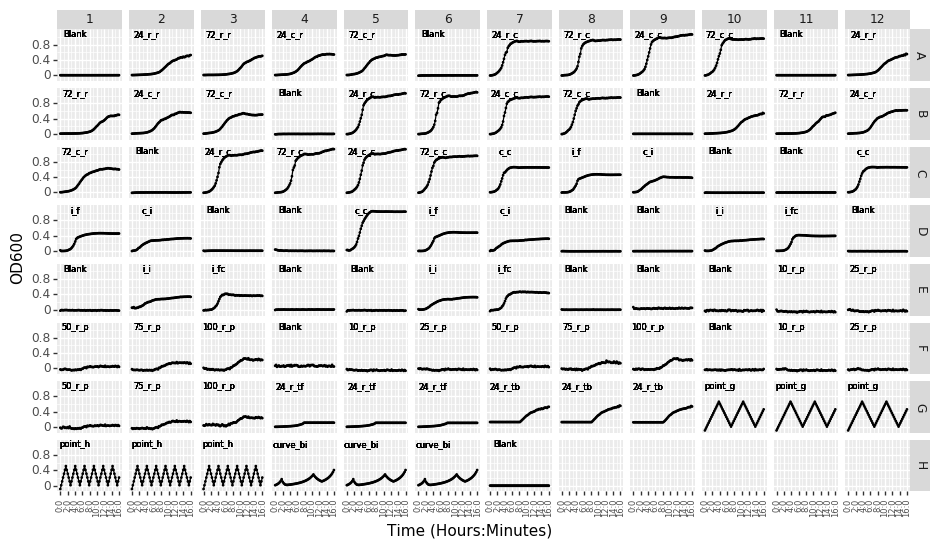

<ggplot: (-9223371895709650280)>


In [16]:
# For each of the plots, the user can select which hours to start and end, or 
# provide only the endpt will result in the 'scaling_params()' function using all hours recorded
# the function is structured as: scaling_params(total_time, x_range_min, x_range_max)
# Providing additional arguments (x_range_min and x_range_max) will specify a window of time to be plotted.
# If the arguments are supplied out of order, the argument names of the function have to be set to those values.
# For more information, check utilities.py (coming from import utilities)


#### User Input
user_params = scaling_params(endpt)
# Choose if the background is subtracted from the readings
plot_background_subtracted=True
file_type = ".pdf"
####


counter = 0

# This format will not support the normalized ones- just regular plots (normalized values use final_df)
for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    # Choosing which variable is on the x-axis
    xvar = "Time"
    # The variable to be plotted on the y-axis can be changed by commenting the if/else statements and specifying manually
    if plot_background_subtracted == True:
        yvar= 'Bgd_subtracted_reading'
        bs = ""
    else:
        yvar= 'Reading' 
        bs = "no_bs_"
    data_to_plot=data_to_use[data_to_use.Channel==channel_to_plot]
    # Resetting the index is crucial to plotting the conditions correctly! This line has to be kept!
    data_to_plot = data_to_plot.reset_index().drop(["index"], axis = 1)
    # Basing the x labeling position off break_list makes it more flexible for the different input time ranges
    # These values can be replaced and hard coded for instances where it is necessary to
    x_label_pos = user_params[0][2]*1
    y_label_pos = []
    # In order for flexible positions, y_var_combined is based on the combined dataframe 
    # (calculates the averages per channel)
    y_var_combined = yvar + "_y"
    for row in combined[combined.Channel==channel_to_plot][y_var_combined]:
        # The scaling and distribution for Ruby is much different than the rest, 
        # so it will have its own multiplier for scaling
        if channel_to_plot == "Ruby":
            # If a channel really had a strange scaling property, 
            # setting y_label_pos = [y-value] manually might be a better fix
            if row in y_label_pos:
                pass
            else:
                y_label_pos.append(row * 1.1)
        else:
            if row in y_label_pos:
                pass
            else:
                y_label_pos.append(row * 4.8)

    # Start of making the plot
    plotnine.options.figure_size=(figure_height,figure_width)
    

    faceted_wells_melted_hours = ggplot(data_to_plot, aes(x=xvar, y=yvar)) +\
            geom_point(size=0.1) +\
            geom_line() +\
            ylab(channel_to_plot)+\
            xlab("Time (Hours:Minutes)") +\
            facet_grid(facets="Plate_Row~Plate_Column")+\
            geom_text(x=x_label_pos, y=y_label_pos[0],size=6,alpha=0.1,label=data_to_plot.Condition) +\
            scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
            theme(axis_text_x=element_text(rotation=90, size = 6))
    print(faceted_wells_melted_hours)
    # Saving the plot with a standardized path
#     faceted_wells_melted_hours.save(os.path.join(plot_path,"faceted_wells_melted_hours_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    # Cycling through the channels to plot
    counter += 1

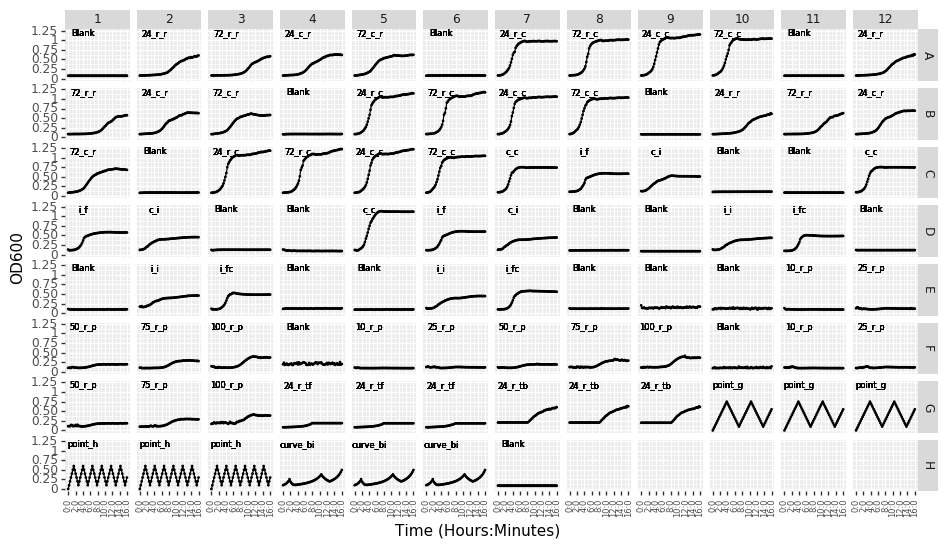

<ggplot: (-9223371895699882952)>


In [17]:
# For each of the plots, the user can select which hours to start and end, or 
# provide only the endpt will result in the 'scaling_params()' function using all hours recorded
# the function is structured as: scaling_params(total_time, x_range_min, x_range_max)
# Providing additional arguments (x_range_min and x_range_max) will specify a window of time to be plotted.
# If the arguments are supplied out of order, the argument names of the function have to be set to those values.
# For more information, check utilities.py (coming from import utilities)


#### User Input
user_params = scaling_params(endpt)
# Choose if the background is subtracted from the readings
plot_background_subtracted=False
file_type = ".pdf"
####


counter = 0

# This format will not support the normalized ones- just regular plots (normalized values use final_df)
for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    # Choosing which variable is on the x-axis
    xvar = "Time"
    # The variable to be plotted on the y-axis can be changed by commenting the if/else statements and specifying manually
    if plot_background_subtracted == True:
        yvar= 'Bgd_subtracted_reading'
        bs = ""
    else:
        yvar= 'Reading' 
        bs = "no_bs_"
    data_to_plot=data_to_use[data_to_use.Channel==channel_to_plot]
    # Resetting the index is crucial to plotting the conditions correctly! This line has to be kept!
    data_to_plot = data_to_plot.reset_index().drop(["index"], axis = 1)
    # Basing the x labeling position off break_list makes it more flexible for the different input time ranges
    # These values can be replaced and hard coded for instances where it is necessary to
    x_label_pos = user_params[0][2]*1
    y_label_pos = []
    # In order for flexible positions, y_var_combined is based on the combined dataframe 
    # (calculates the averages per channel)
    y_var_combined = yvar + "_y"
    for row in combined[combined.Channel==channel_to_plot][y_var_combined]:
        # The scaling and distribution for Ruby is much different than the rest, 
        # so it will have its own multiplier for scaling
        if channel_to_plot == "Ruby":
            # If a channel really had a strange scaling property, 
            # setting y_label_pos = [y-value] manually might be a better fix
            if row in y_label_pos:
                pass
            else:
                y_label_pos.append(row * 1.1)
        else:
            if row in y_label_pos:
                pass
            else:
                y_label_pos.append(row * 3.6)

    # Start of making the plot
    plotnine.options.figure_size=(figure_height,figure_width)

    faceted_wells_melted_hours = ggplot(data_to_plot, aes(x=xvar, y=yvar)) +\
            geom_point(size=0.1) +\
            geom_line() +\
            ylab(channel_to_plot)+\
            xlab("Time (Hours:Minutes)") +\
            facet_grid(facets="Plate_Row~Plate_Column")+\
            geom_text(data=data_to_plot, x=x_label_pos, y=y_label_pos[0],size=6,alpha=0.1,label=data_to_plot.Condition) +\
            scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
            theme(axis_text_x=element_text(rotation=90, size = 6))
    print(faceted_wells_melted_hours)
    # Saving the plot with a standardized path
#     faceted_wells_melted_hours.save(os.path.join(plot_path,"faceted_wells_melted_hours_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    # Cycling through the channels to plot
    counter += 1

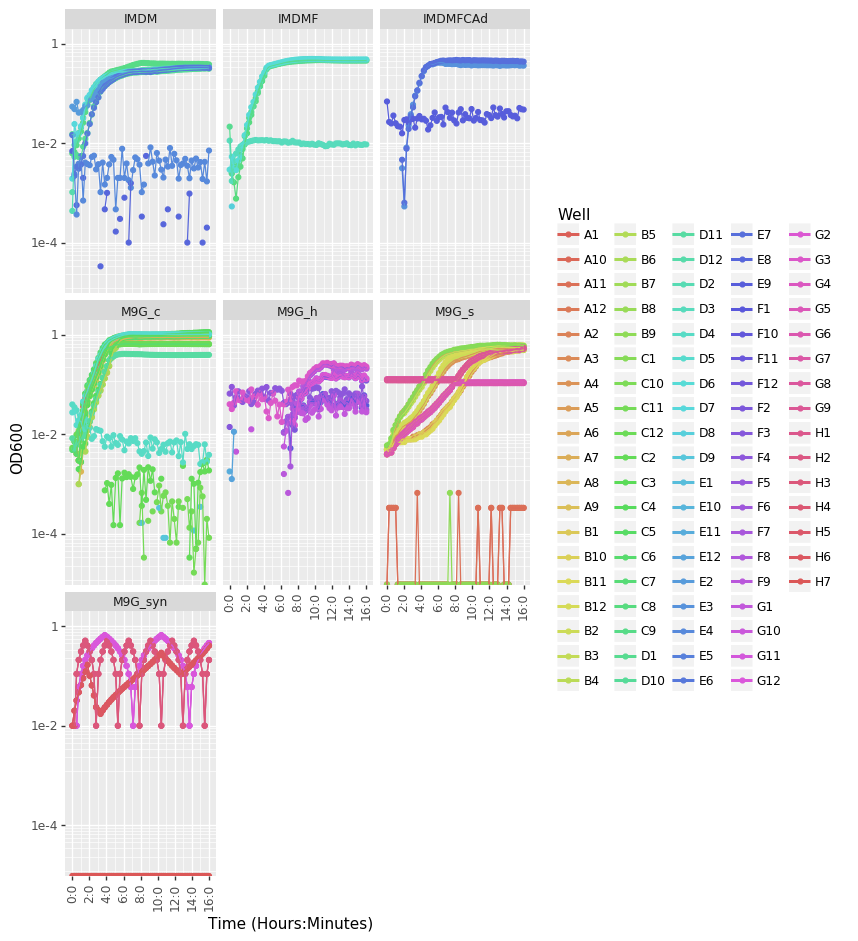

<ggplot: (-9223371895706164052)>


In [18]:
# if want to plot all the data at once overlayed


#### User Input
user_params = scaling_params(endpt)
plot_background_subtracted=True
file_type = ".pdf"
####

counter = 0

for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    xvar = "Time"
    if plot_background_subtracted == True:
        yvar= 'Bgd_subtracted_reading'
        bs = ""
    else:
        yvar= 'Reading'
        bs = "no_bs_"
    data_to_plot=data_to_use[data_to_use.Channel==channel_to_plot]
    plotnine.options.figure_size=(figure_width,figure_height)

    overlayed_plot_melted_hours = ggplot(data_to_plot, aes(x=xvar, y=yvar, color='Well'))+geom_point()+ geom_line()+\
        xlab("Time (Hours:Minutes)") +\
        scale_y_continuous(trans='log10')+\
        facet_wrap("Background_group")+\
        ylab(channel_to_plot) +\
        scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
        theme(axis_text_x=element_text(rotation=90))

    print(overlayed_plot_melted_hours)

#     overlayed_plot_melted_hours.save(os.path.join(plot_path,"overlayed_plot_melted_hours_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    counter += 1

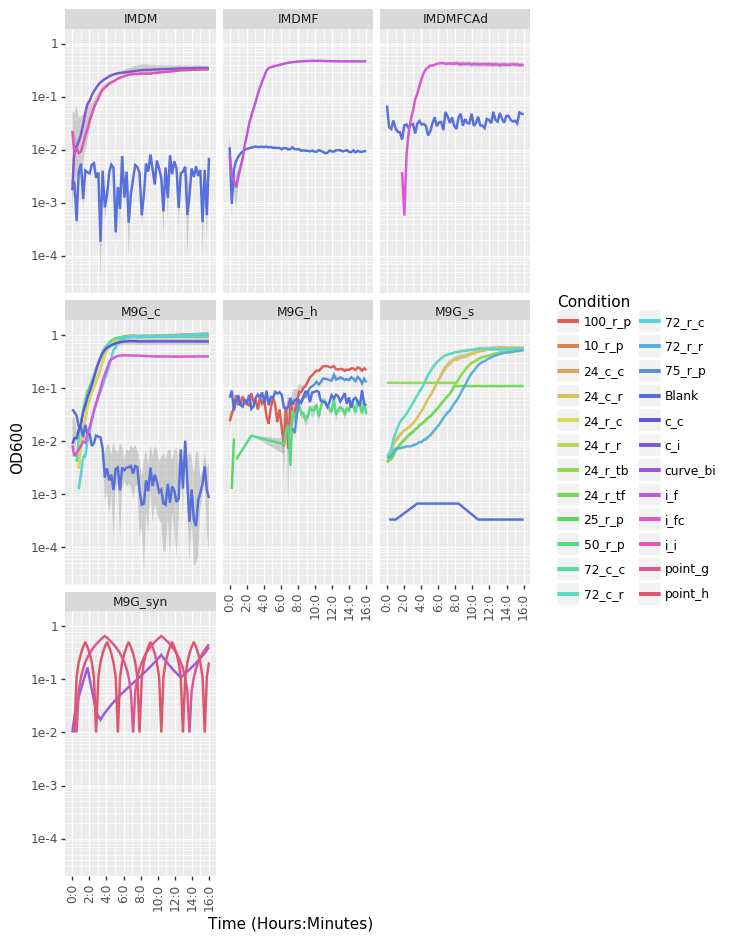

<ggplot: (-9223371895703494076)>


In [19]:
# same thing but plot average of each condition


#### User Input
user_params = scaling_params(endpt)
plot_background_subtracted=True
file_type = ".pdf"
####

counter = 0

for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    xvar = "Time"
    if plot_background_subtracted == True:
        yvar= 'Bgd_subtracted_reading'
        bs = ""
    else:
        yvar= 'Reading'
        bs = "no_bs_"
    data_to_plot=data_to_use[data_to_use.Channel==channel_to_plot]
    plotnine.options.figure_size=(figure_width,figure_height)

    overlayed_average_plot_melted_hours = ggplot(data_to_plot, aes(x=xvar, y=yvar, color='Condition',group='Condition'))+\
        xlab("Time (Hours:Minutes)") +\
        stat_summary(fun_data = "mean_cl_boot", geom = "smooth")+\
        scale_y_continuous(trans='log10')+\
        facet_wrap("Background_group")+\
        ylab(channel_to_plot) +\
        scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
        theme(axis_text_x=element_text(rotation=90))
    print(overlayed_average_plot_melted_hours)

#     overlayed_average_plot_melted_hours.save(os.path.join(plot_path,"overlayed_average_plot_melted_hours_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    counter += 1

### Simple Curves

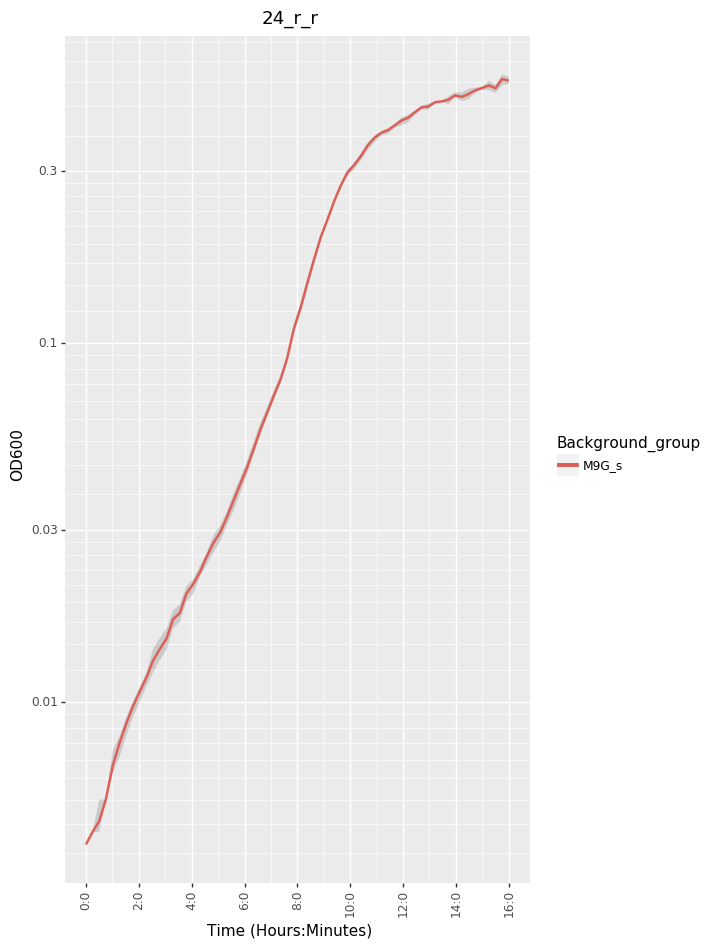

<ggplot: (-9223371895702896696)>


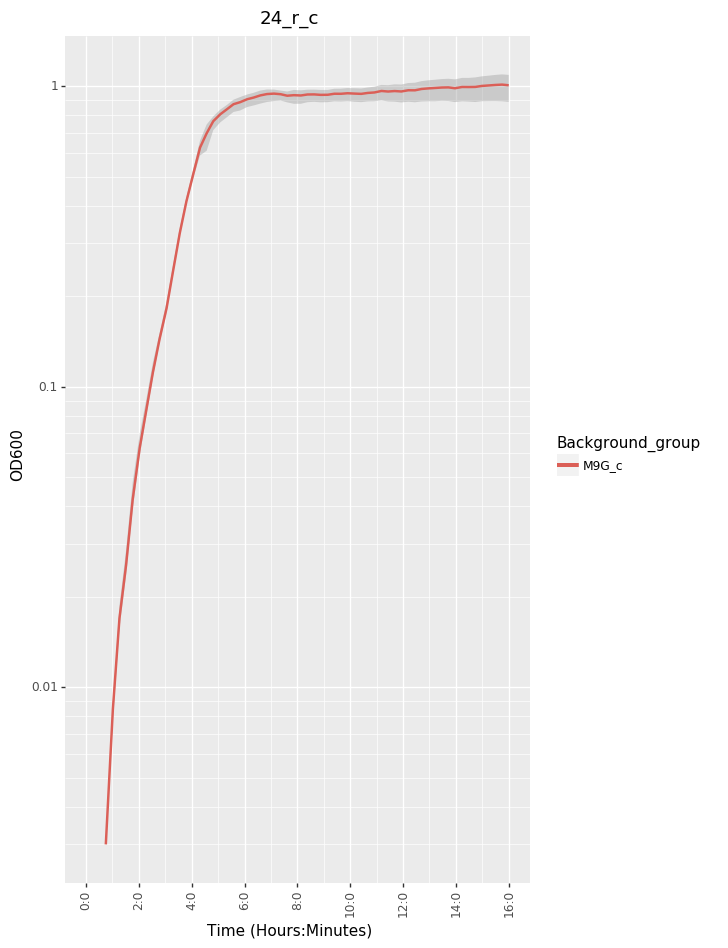

<ggplot: (-9223371895702836280)>


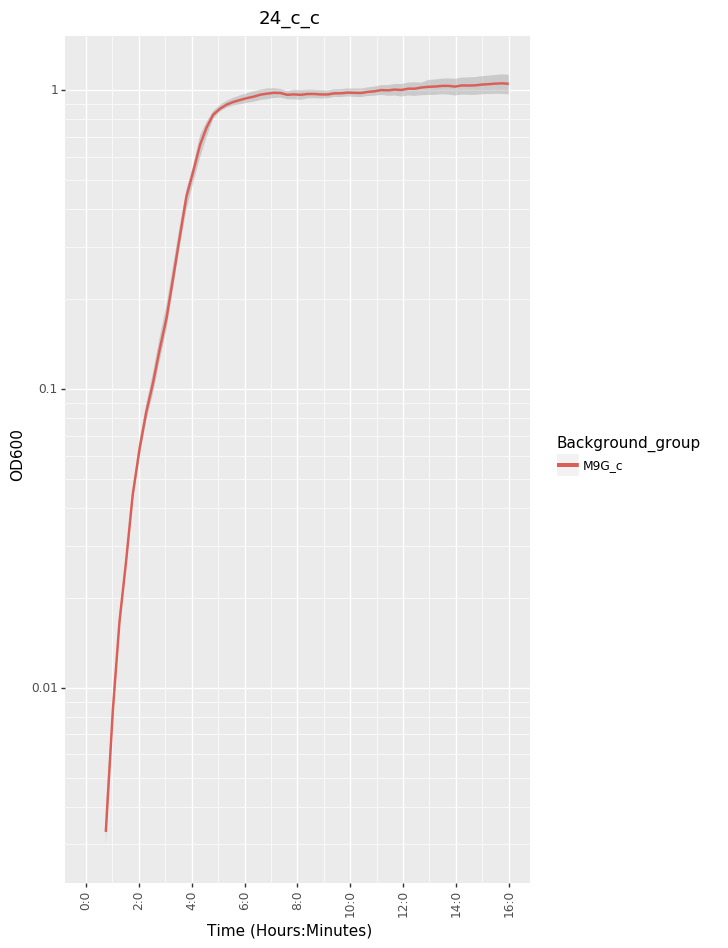

<ggplot: (-9223371895703566728)>


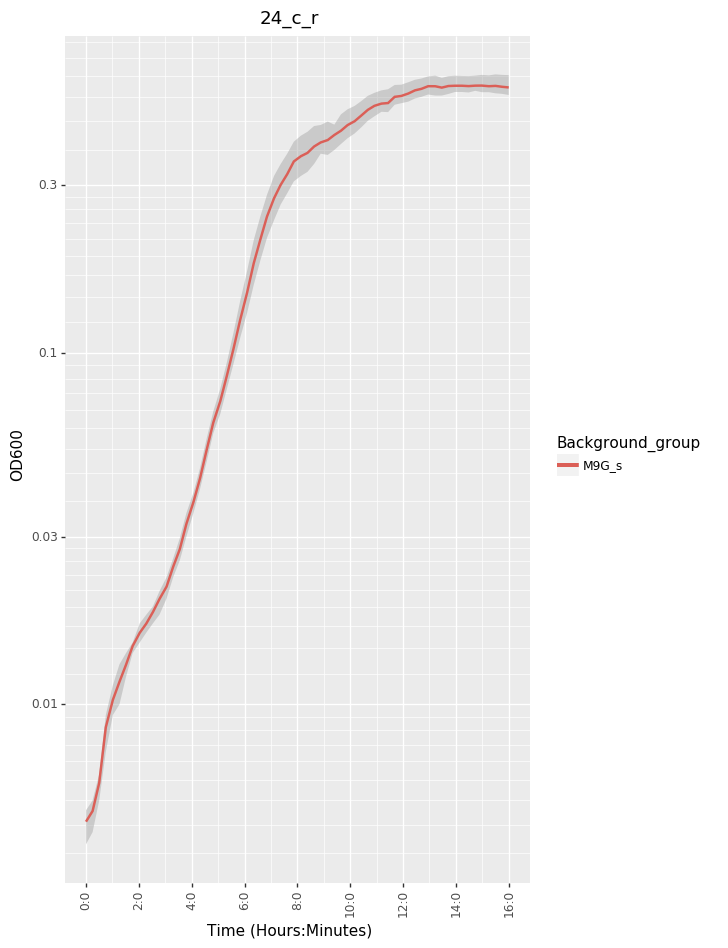

<ggplot: (-9223371895702688012)>


In [20]:
# Same thing as the plot above, but without faceting.
# I am trying to see how these lag times compare 

#### User Input
user_params = scaling_params(endpt)
conditions_to_plot = ["24_r_r", "24_r_c", "24_c_c", "24_c_r"]
plot_background_subtracted=True
file_type = '.pdf'
####



# From an answer at: https://stackoverflow.com/questions/3136689/find-and-replace-string-values-in-list
# words = [word.replace('[br]','<br />') for word in words]
list_of_conditions = [condition.replace(":", "_") for condition in conditions_to_plot]


counter = 0
condition_counter = 0

# Looping through the conditions
for condition in list_of_conditions:
    # Looping through the channels
    for channel_to_plot in channel_list:
        channel_to_plot=channel_list[counter]
        condition_save_name = condition.replace(":", "_")
        xvar = "Time"
        if plot_background_subtracted == True:
            yvar= 'Bgd_subtracted_reading'
            bs = ""
        else:
            yvar= "Reading"
            bs = "no_bs_"
        data_to_plot=data_to_use[(data_to_use.Channel==channel_to_plot) & (data_to_use.Condition.str.contains(conditions_to_plot[condition_counter]))]

        plotnine.options.figure_size=(figure_width,figure_height)
        overlayed_average_plot_melted_hours_no_facet = ggplot(data_to_plot, aes(x=xvar, y=yvar, group='Background_group', color = "Background_group"))+\
            xlab("Time (Hours:Minutes)") +\
            stat_summary(fun_data = "mean_cl_boot", geom = "smooth")+\
            scale_y_continuous(trans='log10')+\
            ylab(channel_to_plot) +\
            scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
            theme(axis_text_x=element_text(rotation=90)) +\
            labs(title = condition)

        print(overlayed_average_plot_melted_hours_no_facet)
#         overlayed_average_plot_melted_hours_no_facet.save(os.path.join(plot_path,"overlayed_average_plot_melted_hours_no_facet_")+bs+channel_to_plot+"_"+str(condition_save_name)+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
        counter += 1
    # Resetting the channel counter per condition
    counter = 0
    # Cycling through the conditions
    condition_counter += 1

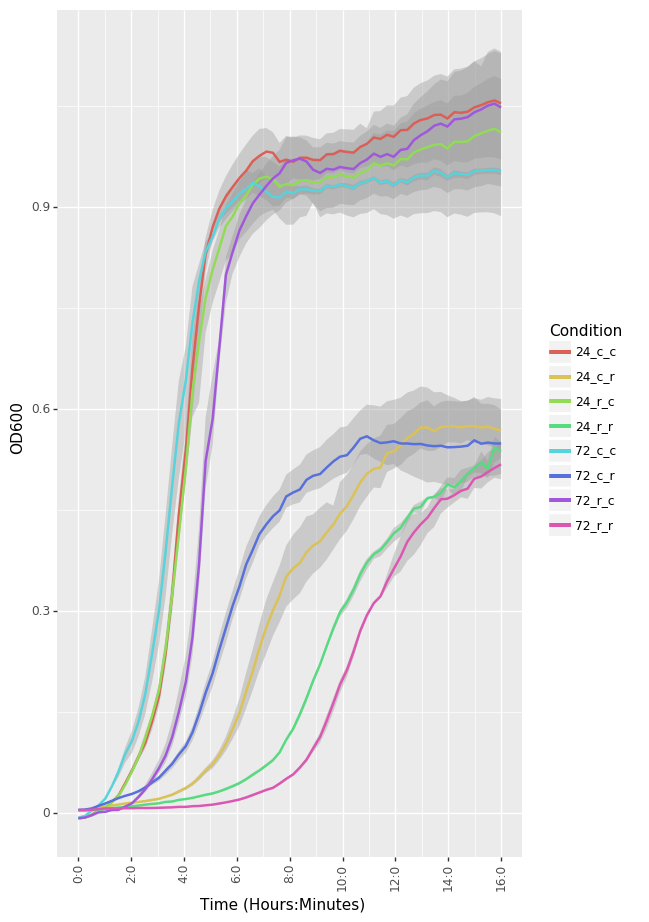

<ggplot: (-9223371895703494236)>


In [21]:
# if just wanted to plot a subset of data - there is a way to subset data in R for ggplot2 but I don't see anything similar in plotnine

#### User Input
user_params = scaling_params(endpt)
conditions_to_plot = ["24_r_r", "24_r_c", "24_c_c", "24_c_r",
                      "72_r_r", "72_r_c", "72_c_c", "72_c_r"
                     ]
plot_background_subtracted=True
file_type = ".pdf"
####


counter = 0

for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    xvar = "Time"
    if plot_background_subtracted:
        yvar= 'Bgd_subtracted_reading'
        bs = ""
    else:
        yvar= "Reading"
        bs = "no_bs_"
    data_to_plot=data_to_use[(data_to_use.Channel==channel_to_plot) & (data_to_use.Condition.isin(conditions_to_plot))]
    plotnine.options.figure_size=(figure_width,figure_height)


    condition_subset_melted_hours = ggplot(data_to_plot, aes(x=xvar, y=yvar, color='Condition',group='Condition'))+\
        stat_summary(fun_data = "mean_cl_boot", geom = "smooth")+\
        xlab("Time (Hours:Minutes)") +\
        ylab(channel_to_plot) +\
        scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
        theme(axis_text_x=element_text(rotation=90))


    print(condition_subset_melted_hours)

#     condition_subset_melted_hours.save(os.path.join(plot_path,"condition_subset_melted_hours_simple_no_log_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    counter += 1

### Challenging Curves

#### Ferric Chloride

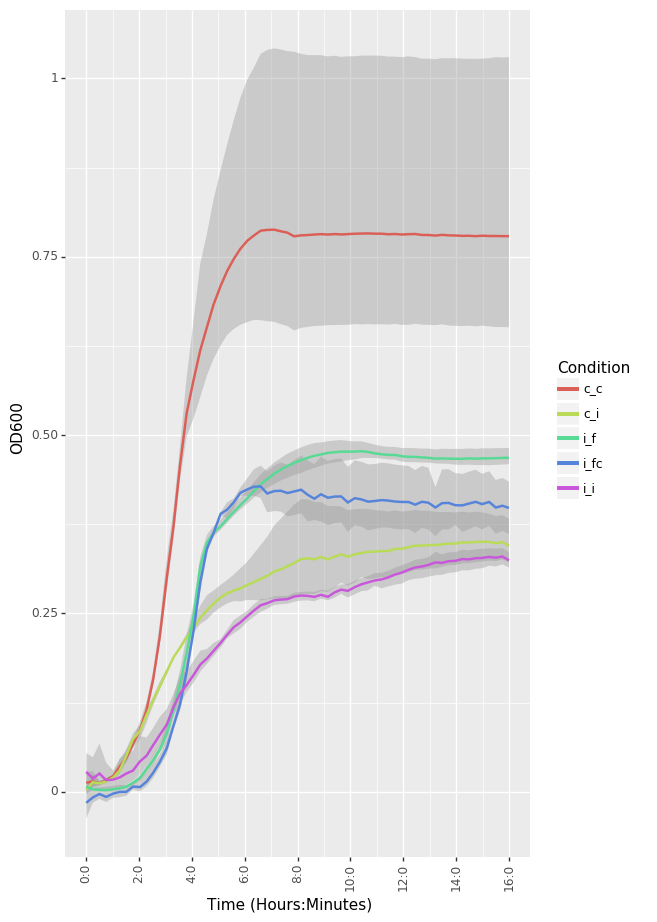

<ggplot: (-9223371895702589436)>


In [22]:
# if just wanted to plot a subset of data - there is a way to subset data in R for ggplot2 but I don't see anything similar in plotnine

#### User Input
user_params = scaling_params(endpt)
conditions_to_plot=["c_c", "i_f", "c_i", 
                    "c_i", "i_i", "i_fc"
                   ]
plot_background_subtracted=True
file_type = ".pdf"
####


counter = 0

for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    xvar = "Time"
    if plot_background_subtracted:
        yvar= 'Bgd_subtracted_reading'
        bs = ""
    else:
        yvar= "Reading"
        bs = "no_bs_"
    data_to_plot=data_to_use[(data_to_use.Channel==channel_to_plot) & (data_to_use.Condition.isin(conditions_to_plot))]
    plotnine.options.figure_size=(figure_width,figure_height)


    condition_subset_melted_hours = ggplot(data_to_plot, aes(x=xvar, y=yvar, color='Condition',group='Condition'))+\
        stat_summary(fun_data = "mean_cl_boot", geom = "smooth")+\
        xlab("Time (Hours:Minutes)") +\
        ylab(channel_to_plot) +\
        scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
        theme(axis_text_x=element_text(rotation=90))


    print(condition_subset_melted_hours)

#     condition_subset_melted_hours.save(os.path.join(plot_path,"condition_subset_melted_hours_challenging_fe_no_log_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    counter += 1

#### Noise: Broken Tecan- Pi

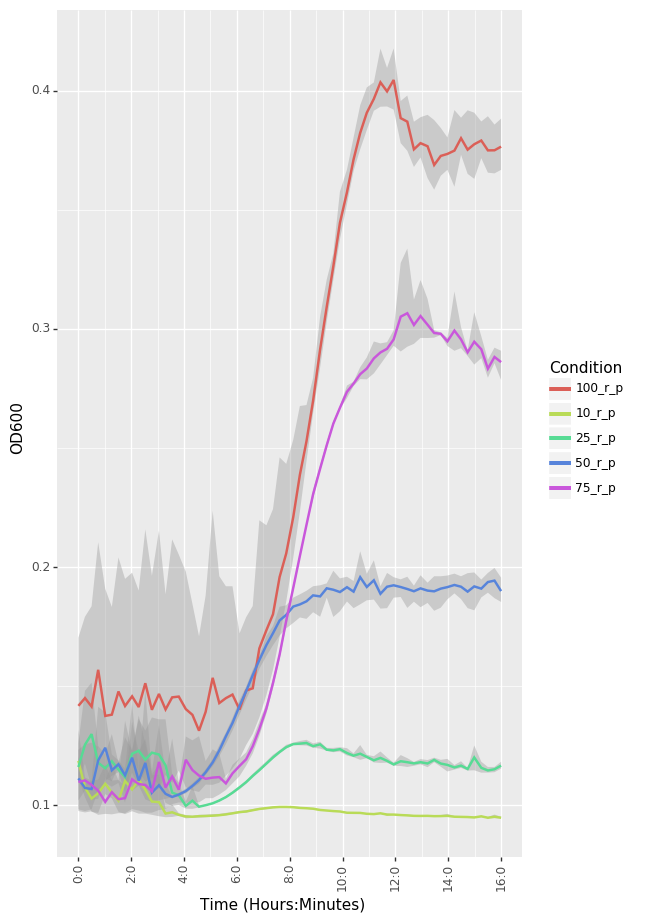

<ggplot: (-9223371895703059092)>


In [23]:
# if just wanted to plot a subset of data - there is a way to subset data in R for ggplot2 but I don't see anything similar in plotnine

#### User Input
user_params = scaling_params(endpt)
conditions_to_plot=["10_r_p", "25_r_p", "50_r_p",
                    "75_r_p", "100_r_p"
                   ]
plot_background_subtracted=False
file_type = ".pdf"
####


counter = 0

for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    xvar = "Time"
    if plot_background_subtracted:
        yvar= 'Bgd_subtracted_reading'
        bs = ""
    else:
        yvar= "Reading"
        bs = "no_bs_"
    data_to_plot=data_to_use[(data_to_use.Channel==channel_to_plot) & (data_to_use.Condition.isin(conditions_to_plot))]
    plotnine.options.figure_size=(figure_width,figure_height)


    condition_subset_melted_hours = ggplot(data_to_plot, aes(x=xvar, y=yvar, color='Condition',group='Condition'))+\
        stat_summary(fun_data = "mean_cl_boot", geom = "smooth")+\
        xlab("Time (Hours:Minutes)") +\
        ylab(channel_to_plot) +\
        scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
        theme(axis_text_x=element_text(rotation=90))


    print(condition_subset_melted_hours)

#     condition_subset_melted_hours.save(os.path.join(plot_path,"condition_subset_melted_hours_challenging_noise_no_log_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    counter += 1

### Extremely Challenging: Synthetic Data

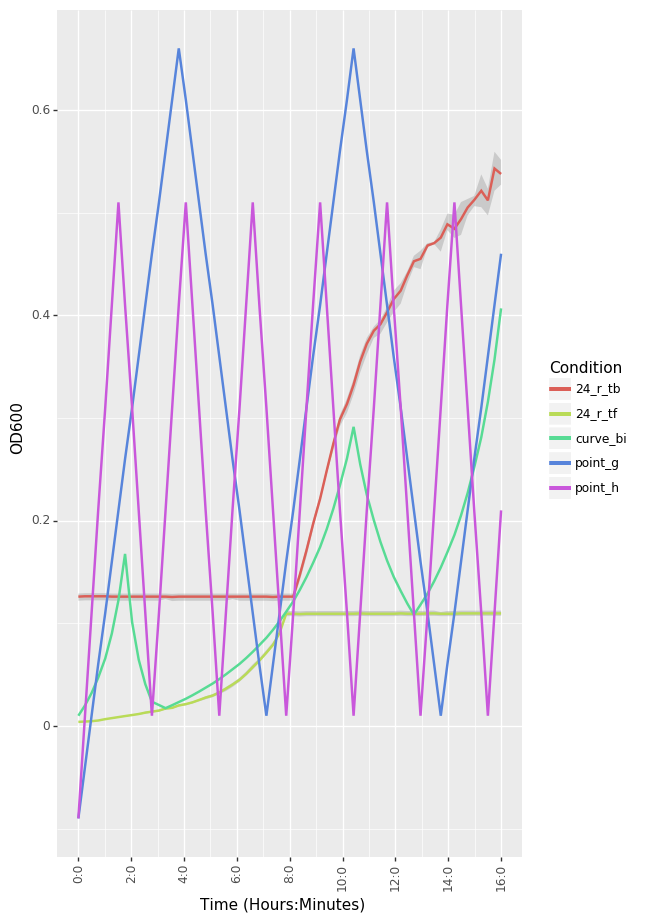

<ggplot: (-9223371895702303424)>


In [24]:
# This is the same plot as previously, just no log transformation on the y-axis



#### User Input
user_params = scaling_params(endpt)
conditions_to_plot=["24_r_tf", "24_r_tb", 
                    "point_g", "point_h",
                    "curve_bi"
                   ]
plot_background_subtracted=True
file_type = ".pdf"
####


counter = 0

for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    xvar = "Time"
    if plot_background_subtracted:
        yvar= 'Bgd_subtracted_reading'
        bs = ""
    else:
        yvar= "Reading"
        bs = "no_bs_"
    data_to_plot=data_to_use[(data_to_use.Channel==channel_to_plot) & (data_to_use.Condition.isin(conditions_to_plot))]
    plotnine.options.figure_size=(figure_width,figure_height)


    condition_subset_melted_hours = ggplot(data_to_plot, aes(x=xvar, y=yvar, color='Condition',group='Condition'))+\
        stat_summary(fun_data = "mean_cl_boot", geom = "smooth")+\
        xlab("Time (Hours:Minutes)") +\
        ylab(channel_to_plot) +\
        scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
        theme(axis_text_x=element_text(rotation=90))


    print(condition_subset_melted_hours)

#     condition_subset_melted_hours.save(os.path.join(plot_path,"condition_subset_melted_hours_synthetic_no_log")+bs+channel_to_plot+"_"+user_params[6]+'_mg_no_log'+file_type, height=figure_width, width=figure_height)
    counter += 1

#### Using final_df

In [25]:
# Setting the right data to use
# this line will need to be rerun for the plots below if data_to_use == df_melted
data_to_use = final_to_use

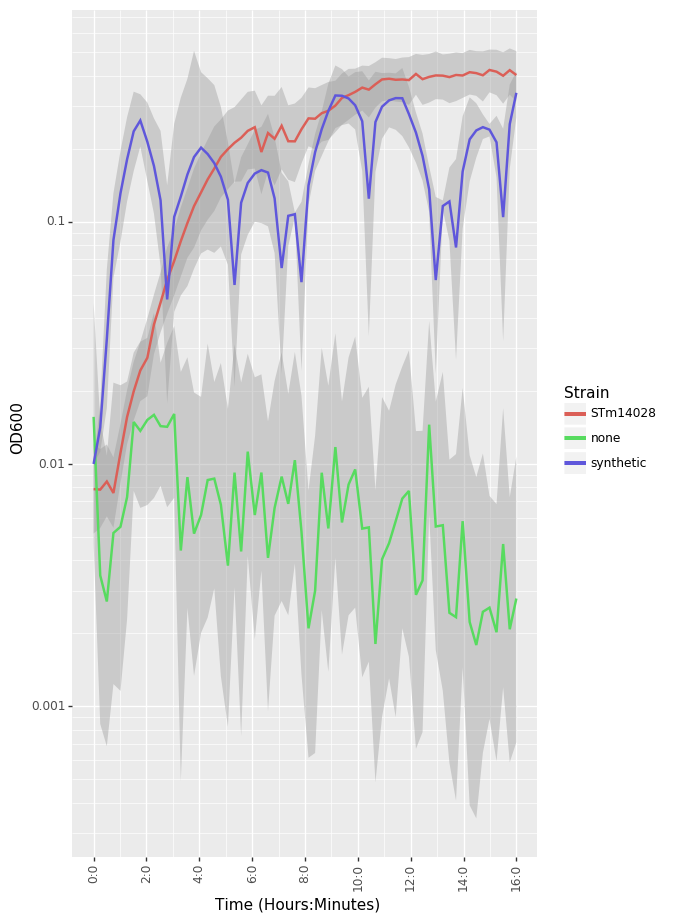

<ggplot: (-9223371895699405716)>


In [26]:
# Looking at each strain


#### User Input
user_params = scaling_params(endpt)
plot_background_subtracted=True
file_type = ".pdf"
####

counter = 0

for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    xvar = "Time"
    if plot_background_subtracted:
        yvar= 'Bgd_subtracted_'+channel_to_plot
        bs = ""
    else:
        yvar= channel_to_plot
        bs = "no_bs_"
    plotnine.options.figure_size=(figure_width,figure_height)

    strain_comparison_overlayed_hours = ggplot(data_to_use, aes(x=xvar, y=yvar, color='Strain',group='Strain'))+\
        stat_summary(fun_data = "mean_cl_boot", geom = "smooth")+\
        scale_y_continuous(trans='log10')+\
        ylab(channel_to_plot) +\
        xlab("Time (Hours:Minutes)") +\
        scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
        theme(axis_text_x=element_text(rotation=90))

    print(strain_comparison_overlayed_hours)

#     strain_comparison_overlayed_hours.save(os.path.join(plot_path,"strain_comparison_overlayed_hours_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    counter += 1

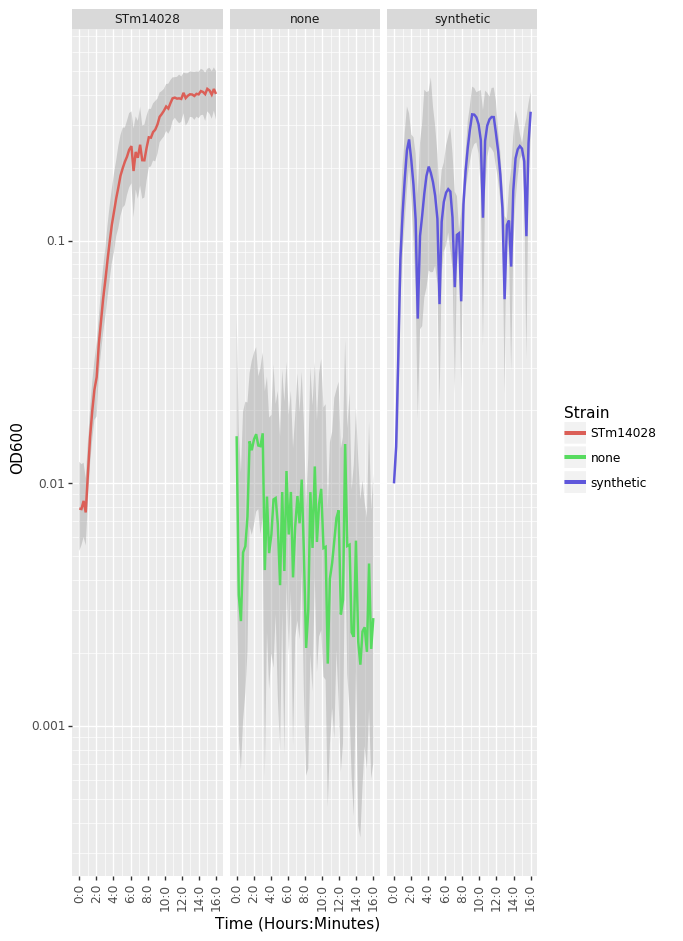

<ggplot: (-9223371895702328748)>


In [27]:
# Looking at each strain


#### User Input
user_params = scaling_params(endpt)
plot_background_subtracted=True
file_type = ".pdf"
####

counter = 0

for channel_to_plot in channel_list:
    channel_to_plot=channel_list[counter]
    xvar = "Time"
    if plot_background_subtracted:
        yvar= 'Bgd_subtracted_'+channel_to_plot
        bs = ""
    else:
        yvar= channel_to_plot
        bs = "no_bs_"
    plotnine.options.figure_size=(figure_width,figure_height)

    strain_comparison_facet_hours = ggplot(data_to_use, aes(x=xvar, y=yvar, color='Strain',group='Strain'))+\
        stat_summary(fun_data = "mean_cl_boot", geom = "smooth")+\
        scale_y_continuous(trans='log10')+\
        ylab(channel_to_plot)+\
        xlab("Time (Hours:Minutes)") +\
        scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
        theme(axis_text_x=element_text(rotation=90)) +\
        facet_wrap("Strain")


    print(strain_comparison_facet_hours)

#     strain_comparison_facet_hours.save(os.path.join(plot_path,"strain_comparison_facet_hours_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    counter += 1

### Plotting Normalizations

In [28]:
# Looking at each strain


#### User Input
user_params = scaling_params(endpt)
plot_background_subtracted=True
file_type = ".pdf"
####


# Not plotting the normalization for OD600 because that would not be useful
non_od600 = []

for channel in channel_list:
    if channel == "OD600":
        pass
    else:
        non_od600.append(channel)

# Start of plotting
counter = 0

for channel_to_plot in non_od600:
    channel_to_plot=non_od600[counter]
    xvar = "Time"
    if plot_background_subtracted:
        yvar= 'Bgd_subtracted_'+channel_to_plot+"_Norm"
        bs = ""
    else:
        yvar= channel_to_plot
        bs = "no_bs_"
    plotnine.options.figure_size=(figure_width,figure_height)

    OD600_normalized_hours_condition = ggplot(data_to_use, aes(x=xvar, y=yvar, color='Strain',group="Strain"))+\
        stat_summary(fun_data = "mean_cl_boot", geom = "smooth")+\
        scale_y_continuous(trans='log10')+\
        ylab(channel_to_plot)+\
        xlab("Time (Hours:Minutes)") +\
        scale_x_continuous(breaks = user_params[0], labels = user_params[4], limits = user_params[5]) +\
        theme(axis_text_x=element_text(rotation=90)) +\
        facet_wrap("Background_group")



    print(OD600_normalized_hours_condition)

#     OD600_normalized_hours_condition.save(os.path.join(plot_path,"OD600_normalized_hours_condition_")+bs+channel_to_plot+"_"+user_params[6]+file_type, height=figure_width, width=figure_height)
    counter += 1